In [3]:
import json

with open('data.json') as f:
    data = json.load(f)
    extracted_data = []

for item in data:
    extracted_item = {
        'appointmentId': item.get('appointmentId'),
        'phoneNumber': item.get('phoneNumber'),
        'firstName': item.get('patientDetails', {}).get('firstName'),
        'lastName': item.get('patientDetails', {}).get('lastName'),
        'gender': item.get('patientDetails', {}).get('gender'),
        'DOB': item.get('patientDetails', {}).get('birthDate')
    }
    extracted_data.append(extracted_item)

for item in extracted_data:
    gender = item['gender']
    if gender == 'M':
        item['gender'] = 'male'
    elif gender == 'F':
        item['gender'] = 'female'
    else:
        item['gender'] = 'others'

for item in extracted_data:
    patient_details = item.get('patientDetails', {})
    item['DOB'] = patient_details.get('birthDate')

for item in extracted_data:
    firstName = item.get('firstName')
    lastName = item.get('lastName')
    item['fullName'] = f"{firstName} {lastName}"

In [5]:
import json

with open('data.json') as f:
    data = json.load(f)
    extracted_data = []

for item in data:
    extracted_item = {
        'appointmentId': item.get('appointmentId'),
        'phoneNumber': item.get('phoneNumber'),
        'firstName': item.get('patientDetails', {}).get('firstName'),
        'lastName': item.get('patientDetails', {}).get('lastName'),
        'gender': item.get('patientDetails', {}).get('gender'),
        'DOB': item.get('patientDetails', {}).get('birthDate')
    }
    extracted_data.append(extracted_item)

for item in extracted_data:
    gender = item['gender']
    if gender == 'M':
        item['gender'] = 'male'
    elif gender == 'F':
        item['gender'] = 'female'
    else:
        item['gender'] = 'others'

for item in extracted_data:
    patient_details = item.get('patientDetails', {})
    item['DOB'] = patient_details.get('birthDate')

for item in extracted_data:
    firstName = item.get('firstName')
    lastName = item.get('lastName')
    item['fullName'] = f"{firstName} {lastName}"

In [6]:
import json
import re

def is_valid_phone_number(phone_number):
    # Remove any non-digit characters from the phone number
    cleaned_number = re.sub(r'\D', '', phone_number)

    # Check if the cleaned number matches the valid Indian phone number pattern
    if re.match(r'^(?:\+?91)?[6-9]\d{9}$', cleaned_number):
        return True
    else:
        return False

with open('data.json') as f:
    data = json.load(f)
    extracted_data = []

for item in data:
    extracted_item = {
        'appointmentId': item.get('appointmentId'),
        'phoneNumber': item.get('phoneNumber'),
        'firstName': item.get('patientDetails', {}).get('firstName'),
        'lastName': item.get('patientDetails', {}).get('lastName'),
        'gender': item.get('patientDetails', {}).get('gender'),
        'DOB': item.get('patientDetails', {}).get('birthDate')
    }
    extracted_data.append(extracted_item)

for item in extracted_data:
    gender = item['gender']
    if gender == 'M':
        item['gender'] = 'male'
    elif gender == 'F':
        item['gender'] = 'female'
    else:
        item['gender'] = 'others'

for item in extracted_data:
    patient_details = item.get('patientDetails', {})
    item['DOB'] = patient_details.get('birthDate')

for item in extracted_data:
    phoneNumber = item.get('phoneNumber')
    item['isValidMobile'] = is_valid_phone_number(phoneNumber)

In [7]:
import json
import re
import hashlib

def is_valid_phone_number(phone_number):
    # Remove any non-digit characters from the phone number
    cleaned_number = re.sub(r'\D', '', phone_number)

    # Check if the cleaned number matches the valid Indian phone number pattern
    if re.match(r'^(?:\+?91)?[6-9]\d{9}$', cleaned_number):
        return True
    else:
        return False

def hash_phone_number(phone_number):
    # Convert the phone number to bytes
    phone_number_bytes = phone_number.encode('utf-8')

    # Create a SHA256 hash object
    sha256_hash = hashlib.sha256()

    # Update the hash object with the phone number bytes
    sha256_hash.update(phone_number_bytes)

    # Get the hexadecimal representation of the hash
    hashed_number = sha256_hash.hexdigest()

    return hashed_number

with open('data.json') as f:
    data = json.load(f)
    extracted_data = []

for item in data:
    extracted_item = {
        'appointmentId': item.get('appointmentId'),
        'phoneNumber': item.get('phoneNumber'),
        'firstName': item.get('patientDetails', {}).get('firstName'),
        'lastName': item.get('patientDetails', {}).get('lastName'),
        'gender': item.get('patientDetails', {}).get('gender'),
        'DOB': item.get('patientDetails', {}).get('birthDate')
    }
    extracted_data.append(extracted_item)

for item in extracted_data:
    gender = item['gender']
    if gender == 'M':
        item['gender'] = 'male'
    elif gender == 'F':
        item['gender'] = 'female'
    else:
        item['gender'] = 'others'

for item in extracted_data:
    patient_details = item.get('patientDetails', {})
    item['DOB'] = patient_details.get('birthDate')

for item in extracted_data:
    phoneNumber = item.get('phoneNumber')
    if is_valid_phone_number(phoneNumber):
        item['phoneNumberHash'] = hash_phone_number(phoneNumber)
    else:
        item['phoneNumberHash'] = None


In [8]:
import json
import re
import hashlib
from datetime import datetime

def is_valid_phone_number(phone_number):
    # Remove any non-digit characters from the phone number
    cleaned_number = re.sub(r'\D', '', phone_number)

    # Check if the cleaned number matches the valid Indian phone number pattern
    if re.match(r'^(?:\+?91)?[6-9]\d{9}$', cleaned_number):
        return True
    else:
        return False

def hash_phone_number(phone_number):
    # Convert the phone number to bytes
    phone_number_bytes = phone_number.encode('utf-8')

    # Create a SHA256 hash object
    sha256_hash = hashlib.sha256()

    # Update the hash object with the phone number bytes
    sha256_hash.update(phone_number_bytes)

    # Get the hexadecimal representation of the hash
    hashed_number = sha256_hash.hexdigest()

    return hashed_number

def calculate_age(dob):
    if dob is None:
        return None

    current_date = datetime.now()
    dob_date = datetime.strptime(dob, '%Y-%m-%dT%H:%M:%S.%fZ')
    age = current_date.year - dob_date.year

    # Adjust age if the current date is before the birth month/day
    if current_date.month < dob_date.month or (current_date.month == dob_date.month and current_date.day < dob_date.day):
        age -= 1

    return age

with open('data.json') as f:
    data = json.load(f)
    extracted_data = []

for item in data:
    extracted_item = {
        'appointmentId': item.get('appointmentId'),
        'phoneNumber': item.get('phoneNumber'),
        'firstName': item.get('patientDetails', {}).get('firstName'),
        'lastName': item.get('patientDetails', {}).get('lastName'),
        'gender': item.get('patientDetails', {}).get('gender'),
        'DOB': item.get('patientDetails', {}).get('birthDate')
    }
    extracted_data.append(extracted_item)

for item in extracted_data:
    gender = item['gender']
    if gender == 'M':
        item['gender'] = 'male'
    elif gender == 'F':
        item['gender'] = 'female'
    else:
        item['gender'] = 'others'

for item in extracted_data:
    patient_details = item.get('patientDetails', {})
    item['DOB'] = patient_details.get('birthDate')

for item in extracted_data:
    phoneNumber = item.get('phoneNumber')
    if is_valid_phone_number(phoneNumber):
        item['phoneNumberHash'] = hash_phone_number(phoneNumber)
    else:
        item['phoneNumberHash'] = None

for item in extracted_data:
    dob = item.get('DOB')
    item['Age'] = calculate_age(dob)

In [10]:
from collections import Counter

medicines_count = Counter(item['appointmentId'] for item in extracted_data)
active_medicines_count = Counter(
    item['appointmentId'] for item in extracted_data if item.get('IsActive', False))
inactive_medicines_count = Counter(
    item['appointmentId'] for item in extracted_data if not item.get('IsActive', False))

for item in extracted_data:
    appointment_id = item['appointmentId']
    item['noOfMedicines'] = medicines_count[appointment_id]
    item['noOfActiveMedicines'] = active_medicines_count[appointment_id]
    item['noOfInactiveMedicines'] = inactive_medicines_count[appointment_id]

In [11]:
from collections import Counter

medicines_count = Counter(item['appointmentId'] for item in extracted_data)
active_medicines_count = Counter(
    item['appointmentId'] for item in extracted_data if item.get('IsActive', False))
inactive_medicines_count = Counter(
    item['appointmentId'] for item in extracted_data if not item.get('IsActive', False))

for item in extracted_data:
    appointment_id = item['appointmentId']
    item['noOfMedicines'] = medicines_count[appointment_id]
    item['noOfActiveMedicines'] = active_medicines_count[appointment_id]
    item['noOfInactiveMedicines'] = inactive_medicines_count[appointment_id]

    active_medicines = [med['medicineName'] for med in extracted_data if med['appointmentId'] == appointment_id and med.get('IsActive', False)]
    item['medicineNames'] = ', '.join(active_medicines) if active_medicines else ""

In [19]:
extracted_data = []

for item in data:
    extracted_item = {
        'appointmentId': item.get('appointmentId'),
        'phoneNumber': item.get('phoneNumber'),
        'firstName': item.get('patientDetails', {}).get('firstName'),
        'lastName': item.get('patientDetails', {}).get('lastName'),
        'gender': item.get('patientDetails', {}).get('gender'),
        'DOB': item.get('patientDetails', {}).get('birthDate')
    }
    extracted_data.append(extracted_item)

for item in extracted_data:
    gender = item['gender']
    if gender == 'M':
        item['gender'] = 'male'
    elif gender == 'F':
        item['gender'] = 'female'
    else:
        item['gender'] = 'others'

for item in extracted_data:
    patient_details = item.get('patientDetails', {})
    item['DOB'] = patient_details.get('birthDate')

for item in extracted_data:
    firstName = item.get('firstName')
    lastName = item.get('lastName')
    item['fullName'] = f"{firstName} {lastName}"


In [21]:
import json

# Calculate the aggregated data
aggregated_data = {
    'Age': 0,
    'gender': {
        'male': 0,
        'female': 0,
        'others': 0
    },
    'validPhoneNumbers': 0,
    'appointments': 0,
    'medicines': 0,
    'activeMedicines': 0
}

for item in extracted_data:
    # Age calculation logic here
    age = calculate_age(item['DOB'])
    if age is not None:
        aggregated_data['Age'] += age

    # Gender count
    gender = item['gender']
    if gender == 'male':
        aggregated_data['gender']['male'] += 1
    elif gender == 'female':
        aggregated_data['gender']['female'] += 1
    else:
        aggregated_data['gender']['others'] += 1

    # Valid phone numbers count
    phoneNumber = item['phoneNumber']
    if is_valid_phone_number(phoneNumber):
        aggregated_data['validPhoneNumbers'] += 1

    # Appointments count
    aggregated_data['appointments'] += 1

    # Medicines count
    medicines = item.get('medicines', [])
    aggregated_data['medicines'] += len(medicines)

    # Active medicines count
    activeMedicines = [medicine for medicine in medicines if medicine['status'] == 'active']
    aggregated_data['activeMedicines'] += len(activeMedicines)

# Export the aggregated data to a JSON file
output_filename = 'aggregated_data.json'
with open(output_filename, 'w') as file:
    json.dump(aggregated_data, file, indent=4)

print(f"Aggregated data exported to {output_filename} successfully.")


Aggregated data exported to aggregated_data.json successfully.


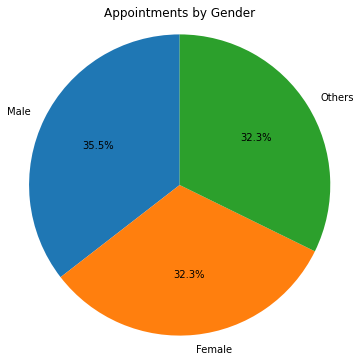

In [22]:
import matplotlib.pyplot as plt

# Count the number of appointments for each gender
appointment_counts = {
    'Male': 0,
    'Female': 0,
    'Others': 0
}

for item in extracted_data:
    gender = item['gender']
    if gender == 'male':
        appointment_counts['Male'] += 1
    elif gender == 'female':
        appointment_counts['Female'] += 1
    else:
        appointment_counts['Others'] += 1

# Plotting the pie chart
labels = appointment_counts.keys()
values = appointment_counts.values()

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Appointments by Gender')
plt.axis('equal')

# Display the pie chart
plt.show()
